<a href="https://colab.research.google.com/github/jafar-albadarneh/data-science-pot/blob/master/Linear_regression_using_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Model on Life expectancy dataset

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Dataset 

**Life expectancy dataset**



In [40]:
data = pd.read_csv("https://assets.datacamp.com/production/repositories/628/datasets/a7e65287ebb197b1267b5042955f27502ec65f31/gm_2008_region.csv", header=0)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    float64
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
 9   Region           139 non-null    object 
dtypes: float64(9), object(1)
memory usage: 11.0+ KB
None


> Since linear models works only with numeric data, we're going to drop the feature `Region`

In [0]:
X = data.drop(['Region','life'], axis=1).values
y = data.life.values
#split the data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

### Training step

In [42]:
## Train the model
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Testing step

In [43]:
## Evaluate model on test set
y_pred = reg.predict(X_test)
# Compute R^2 measure
print(reg.score(X_test,y_test))
r_2 = np.sqrt(mean_squared_error(y_test, y_pred))
print("R^2 measure is: {}".format(r_2))

0.8904169104225165
R^2 measure is: 3.267814052593937


## Training with Cross-Validation
We can't tell if the splitting operation affects the R^2 measure. For such case, `Cross Validation` process is advised.

**Cross Validation** tends to split the data into X folds (often called `cv`). The operation goes as follows:

`fold_0` is being hold as a test set to be evaluated against the trained model with the remaining folds. the resulting `r^2` measure will be stored for further action.
The process sequentially selecting folds ex next(`fold_2`) is then repeat until the last fold.

The result will be a list of `cv` number of measures which can then be processed (ex, taking the `mean`) to get a better insight about the model performance


In [0]:
def cv_reg(estimator, X, y, cv):
  cv_scores = cross_val_score(estimator, X, y, cv=cv)
  #print("R^2 scores for cv {} is : {}".format(cv, cv_scores))
  print("Average {} folds score is : {}".format(cv, np.mean(cv_scores)))
  print("----------")
  print("----------")
  return cv_scores

In [45]:
reg = LinearRegression()
# test cv = 3
cv_reg(reg, X, y, 3)
# test cv = 5
cv_reg(reg, X, y, 5)
# test cv = 10
cv_reg(reg, X, y, 10)

Average 3 folds score is : 0.8718712782622108
----------
----------
Average 5 folds score is : 0.8599627722793232
----------
----------
Average 10 folds score is : 0.8436128620131201
----------
----------


array([0.73564531, 0.7988102 , 0.82780762, 0.86331179, 0.74902465,
       0.94417158, 0.83259108, 0.78157196, 0.95777479, 0.94541964])

## Regualrization
Generally , regression models `Loss functions` needs to be fine-tuned in order to avoid huge attribute coefficient, thus minimzing the probability of ending up overfitting the training data. This process is called **`Regularization`**



### Ridge Regression 

One of the most common regularized regression models is called **Ridge Regression**

The loss function is evaluating to the `OLS Loss function + Squared value of each coefficient multiplied by some constant alpha`

 In other words, during model training and while minimizing the value of the loss function, models are penalized for coefficients with **large magnitudes**

 Picking the right value of `alpha` depends most on experimentation, where multiple alpha values are evaluated ending with selecting the best value that resulted in the minimal loss value. This operation is reffered to `hyper parameter tuning`

In [46]:
# Applying Ridge regression
ridge = Ridge(alpha=2.5, normalize=True)
# we're going to refer to the split operation doen above
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
r_2 = np.sqrt(mean_squared_error(y_test, ridge_pred))
score = ridge.score(X_test, y_test)
print("score: {}".format(score))
print("R^2 measure is: {}".format(r_2))

score: 0.7223990714705135
R^2 measure is: 5.201109808089143


As observed the R^2 measure performed better with the use of regularized regression model

### Lasso Regression
the formular is similar to the `Ridge` model, except that the ***absolute*** value of the coefficients is considered

In [47]:
# Applying Lasso regression
lasso = Lasso(alpha=2.5, normalize=True)
# we're going to refer to the split operation doen above
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
r_2 = np.sqrt(mean_squared_error(y_test, lasso_pred))
score = lasso.score(X_test, y_test)
print("score: {}".format(score))
print("R^2 measure is: {}".format(r_2))

score: -0.018658179448907575
R^2 measure is: 9.963221924249876


> Lasso for Feature Selection
Practically, Lasso regressor can be used as a feature selection tool, which can give you better insights about your data



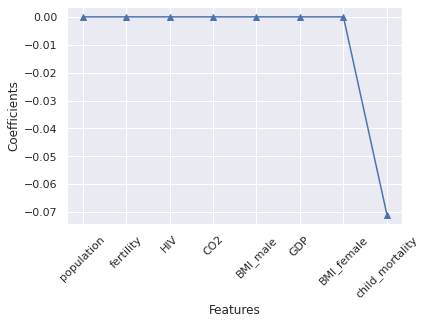

In [58]:
col_names = data.drop(['Region','life'], axis=1).columns
lasso = Lasso(alpha=0.4, normalize=True)
lasso_coeffs = lasso.fit(X, y).coef_

# plot feature importance
sns.set()
plt.plot(range(len(col_names)), lasso_coeffs, marker='^')
plt.xlabel("Features")
plt.xticks(range(len(col_names)), col_names, rotation=45)
plt.ylabel('Coefficients')
plt.show()

As per the coefficients chart, `childs_mortality` appears to be the most important determinant feature for life expectancy 